Connected to cmri (Python 3.9.0)

In [1]:
# This import is necessary to run the code cell-by-cell
try:
    from lab07_solution import *

    print("lab07_solution is being used")

except ImportError:
    from lab07 import *

    print("lab07 is being used")

lab07_solution is being used


In [2]:
op = Lab07_op()
kdata, sens_maps, traj, dc_weights, gt = op.load_data()

In [3]:
[i.shape for i in [kdata, sens_maps, traj, dc_weights, gt]]

[(512, 64, 4), (256, 256, 4), (512, 64), (512, 64), (256, 256)]

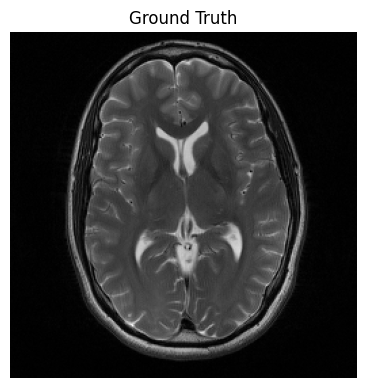

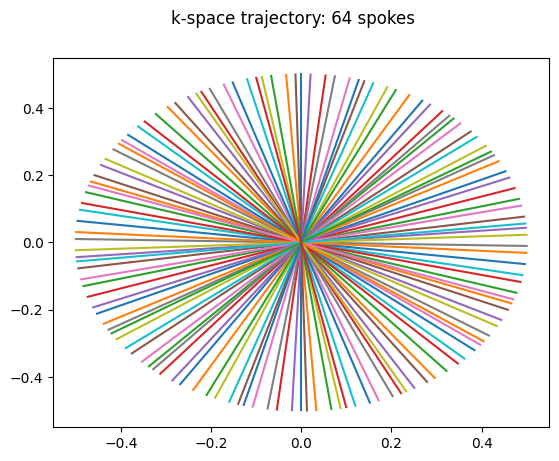

In [4]:
N_ro, N_spokes, N_ch = kdata.shape
utils.imshow([gt], titles=["Ground Truth"])
utils.plot_spocks(traj, N_spokes)

In [5]:
recon_NUFFT = op.nufft_recon(kdata, traj, sens_maps, dc_weights)

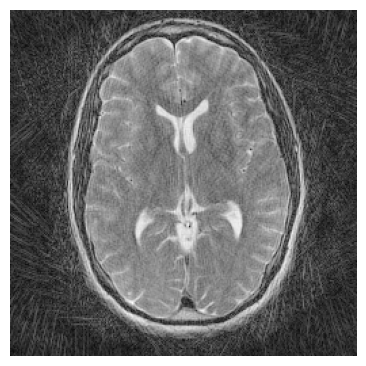

In [7]:
utils.imshow([recon_NUFFT], norm=0.5)

In [9]:
recons_gd, nmse_gd, grad_norm = op.nufft_gd_recon(gt, kdata, traj, sens_maps, iter=10)
recons_gd2, nmse_gd2, grad_norm2 = op.nufft_gd_recon(gt, kdata, traj, sens_maps, iter=100)
recons_gd3, nmse_gd3, grad_norm3 = op.nufft_gd_recon(gt, kdata, traj, sens_maps, iter=300)

  0%|          | 0/10 [00:00<?, ?iter/s]

  0%|          | 0/100 [00:00<?, ?iter/s]

  0%|          | 0/300 [00:00<?, ?iter/s]

In [11]:
[len(i) for i in [recons_gd, recons_gd2, recons_gd3]]

[10, 100, 300]

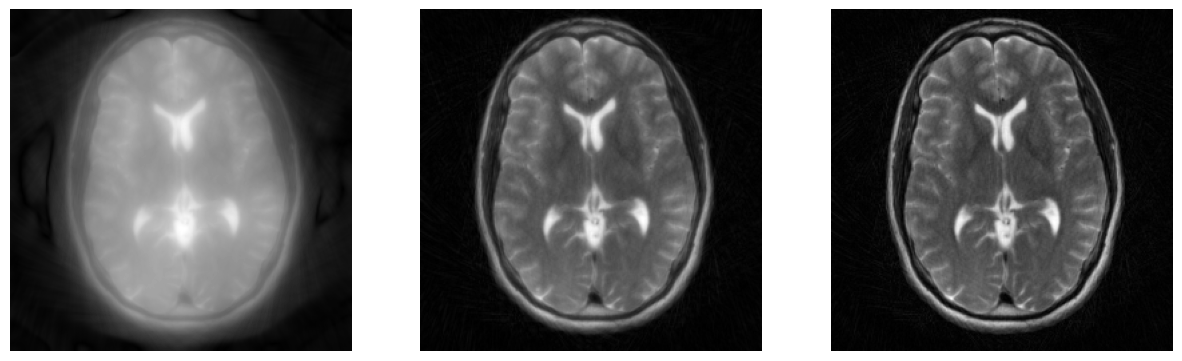

In [10]:
utils.imshow([i[-1] for i in [recons_gd, recons_gd2, recons_gd3]])

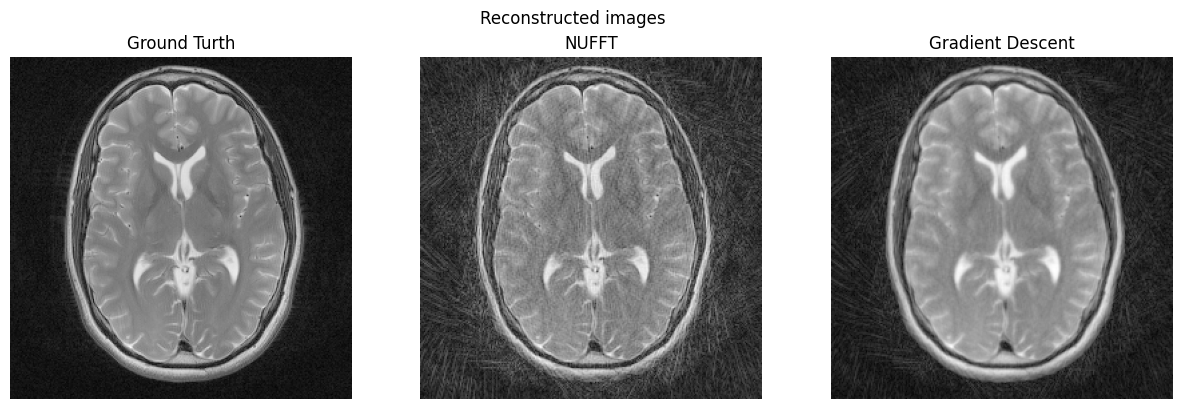

In [13]:
utils.imshow(
    [gt, recon_NUFFT, recons_gd3[-1]],
    titles=["Ground Turth", "NUFFT", "Gradient Descent"],
    suptitle="Reconstructed images",
    norm=0.5,
)

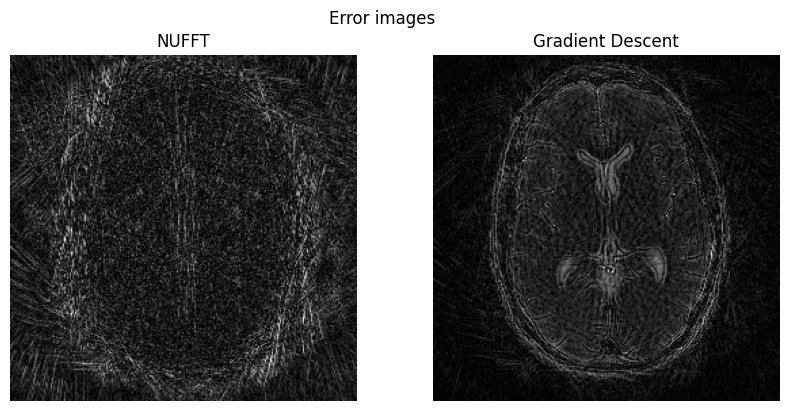

In [7]:
recon_imgs = [recon_NUFFT, recons_gd[-1]]
recon_imgs = [utils.normalization(i) for i in recon_imgs]
gt_norm = utils.normalization(gt)

utils.imshow(
    [gt_norm - i for i in recon_imgs],
    titles=["NUFFT", "Gradient Descent"],
    suptitle="Error images",
)

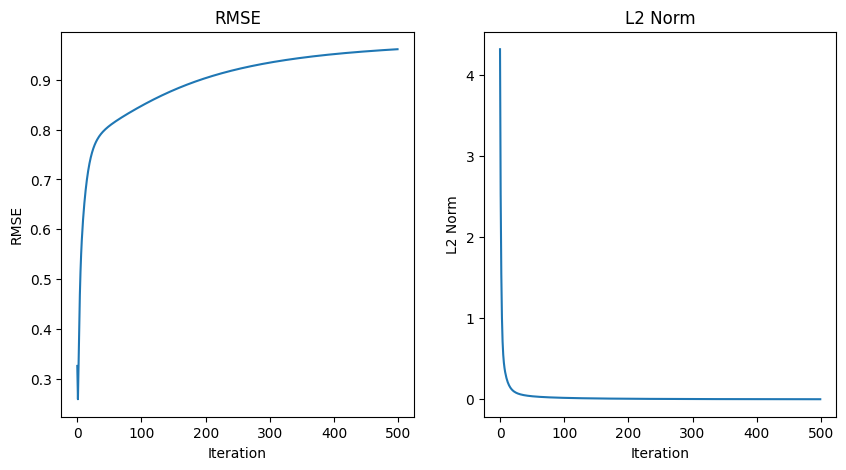

In [8]:
f, a = plt.subplots(1, 2, figsize=(10, 5))

for i, (d, title) in enumerate(zip([nmse_gd, grad_norm], ["RMSE", "L2 Norm"])):
    a[i].plot(d)
    a[i].set_title(title)
    a[i].set_xlabel("Iteration")
    a[i].set_ylabel(title)

In [3]:
tol = 1e-4
maxit = 100
recon_cg, nmse_cg = op.cg_sense(
    kdata,
    traj,
    sens_maps,
    gt=gt,
    # title=f"3_2-CG-SENSE(iter={maxit})",
)

  0%|          | 0/50 [00:00<?, ?iter/s]

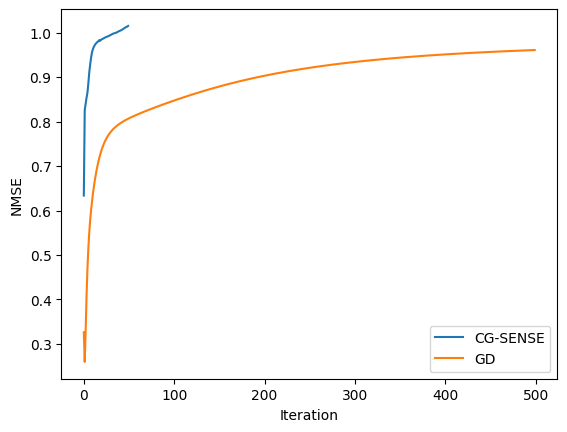

In [10]:
plt.plot(nmse_cg, label="CG-SENSE")
plt.plot(nmse_gd, label="GD")
plt.xlabel("Iteration")
plt.ylabel("NMSE")
plt.legend()
plt.show()

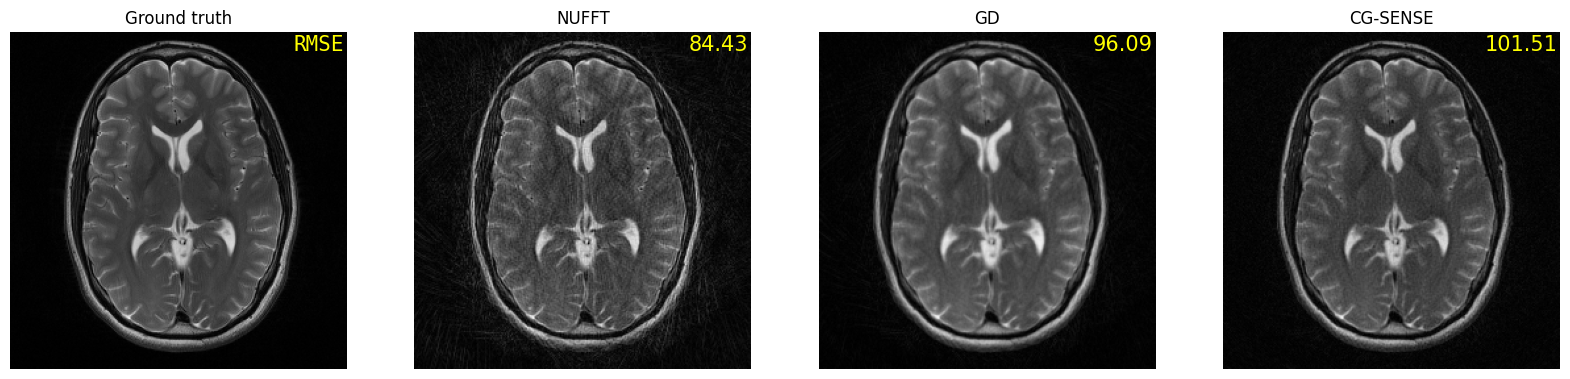

In [11]:
utils.imshow(
    [recon_NUFFT, recons_gd[-1], recon_cg],
    gt=gt,
    titles=["NUFFT", "GD", "CG-SENSE"],
)

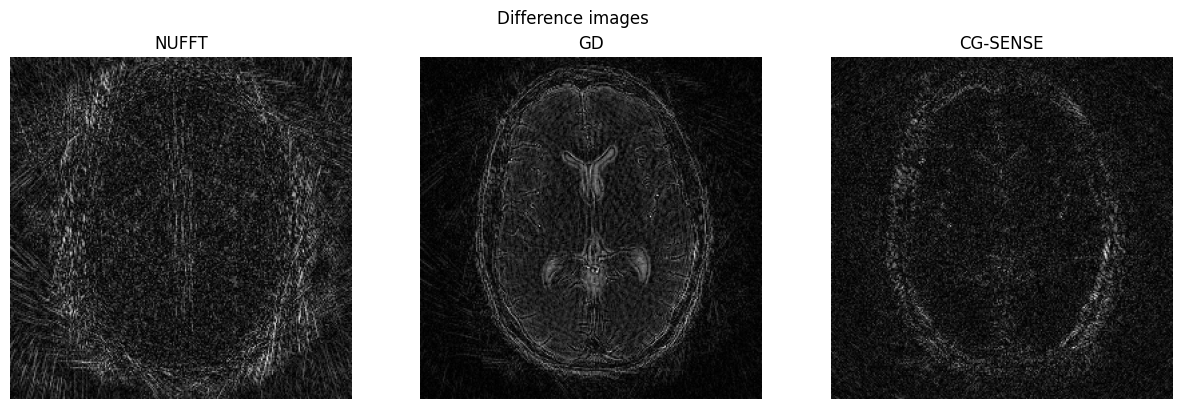

In [12]:
recon_imgs = [recon_NUFFT, recons_gd[-1], recon_cg]
recon_imgs = [utils.normalization(i) for i in recon_imgs]
gt_norm = utils.normalization(gt)

utils.imshow(
    [gt_norm - i for i in recon_imgs],
    suptitle="Difference images",
    titles=["NUFFT", "GD", "CG-SENSE"],
)

## 3.4. Repeat CG reconstruction with noise instead of the k-space data and plot the result in k-space.

  0%|          | 0/500 [00:00<?, ?iter/s]

  0%|          | 0/50 [00:00<?, ?iter/s]

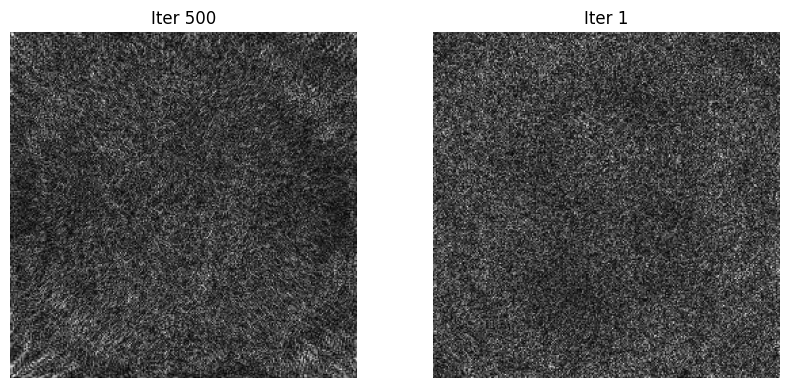

In [13]:
maxit = 500
knoise = np.random.normal(0, 1, kdata.shape) + 1j * np.random.normal(
    0, 1, kdata.shape
)
noise_cg, _ = op.cg_sense(
    knoise, traj, sens_maps, iter=maxit, title=f"3_4-Noise_CG-SENSE(iter={maxit})"
)
noise_recon, _ = op.cg_sense(knoise, traj, sens_maps, maxit=1)

utils.imshow([noise_cg, noise_recon], titles=[f"Iter {maxit}", "Iter 1"])